# Computer Vision

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
%ls

 briefing.csv                     'Creative Assets_.zip'
 campaigns_inventory_updated.csv   global_design_data.json


In [ ]:
%cd Technical Test Aug_2022

/content/drive/.shortcut-targets-by-id/1ZbUU43VrPHqJdRecatoZNlmWXcaeVj2G/Technical Test Aug_2022


In [ ]:
%ls

 briefing.csv                     'Creative Assets_.zip'
 campaigns_inventory_updated.csv   global_design_data.json


In [ ]:
from zipfile import ZipFile

In [45]:
archive = ZipFile('Creative Assets_.zip', mode='r')

In [46]:
%ls

 briefing.csv                     'Creative Assets_.zip'
 campaigns_inventory_updated.csv   global_design_data.json


In [47]:
%ls 'Creative Assets_.zip'

'Creative Assets_.zip'


In [51]:
archive.namelist()

['Creative Assets_/',
 'Creative Assets_/00f7dac06a34bfa538ca0946fb5a881b-9bbd36ef9f39566d36a9.png',
 'Creative Assets_/015f38df736f5a9498b18a1d12170187-d9ca049aca302aaf37fa.png',
 'Creative Assets_/016534141ab870fdbf1b9c163955924d-03dd9f44bd08a97fa731.png',
 'Creative Assets_/02cc1b5d61e0593435316315ad2e6c6f-fe137ec50be57d8c6170.png',
 'Creative Assets_/03231e84227b5038d1ce9c302019da8c-85af3e279da121cae410.png',
 'Creative Assets_/05fa49d47b280182d4684b9f3358ded4-9eac6e3d31ed8b6f8e00.png',
 'Creative Assets_/06262da6542114aaea8a611540a0ee5d-41fa486552572dba1165.png',
 'Creative Assets_/0647328affe8b017f6769b5adfb7ff50-05d4adc1ad83941b7a3e.png',
 'Creative Assets_/0647328affe8b017f6769b5adfb7ff50-9fc6737b8364a37fc595.png',
 'Creative Assets_/06c61d295ee77ed7085a76bac42e4bae-cdebe659bc59dd2ad745.png',
 'Creative Assets_/080ac9223009886832e1a5e426a55910-f4c02eb05e03c3c6c9fd.png',
 'Creative Assets_/08279f85cb63df7394bfa2a9ef4bbe5b-8211834e2d0654dff729.png',
 'Creative Assets_/085e477e7aa

In [77]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [81]:
img = cv.imread('Creative Assets_/ffaa0f351ee62e98a7d0e8f5fd6f78f1-57adef6d764fcf32199b.png')

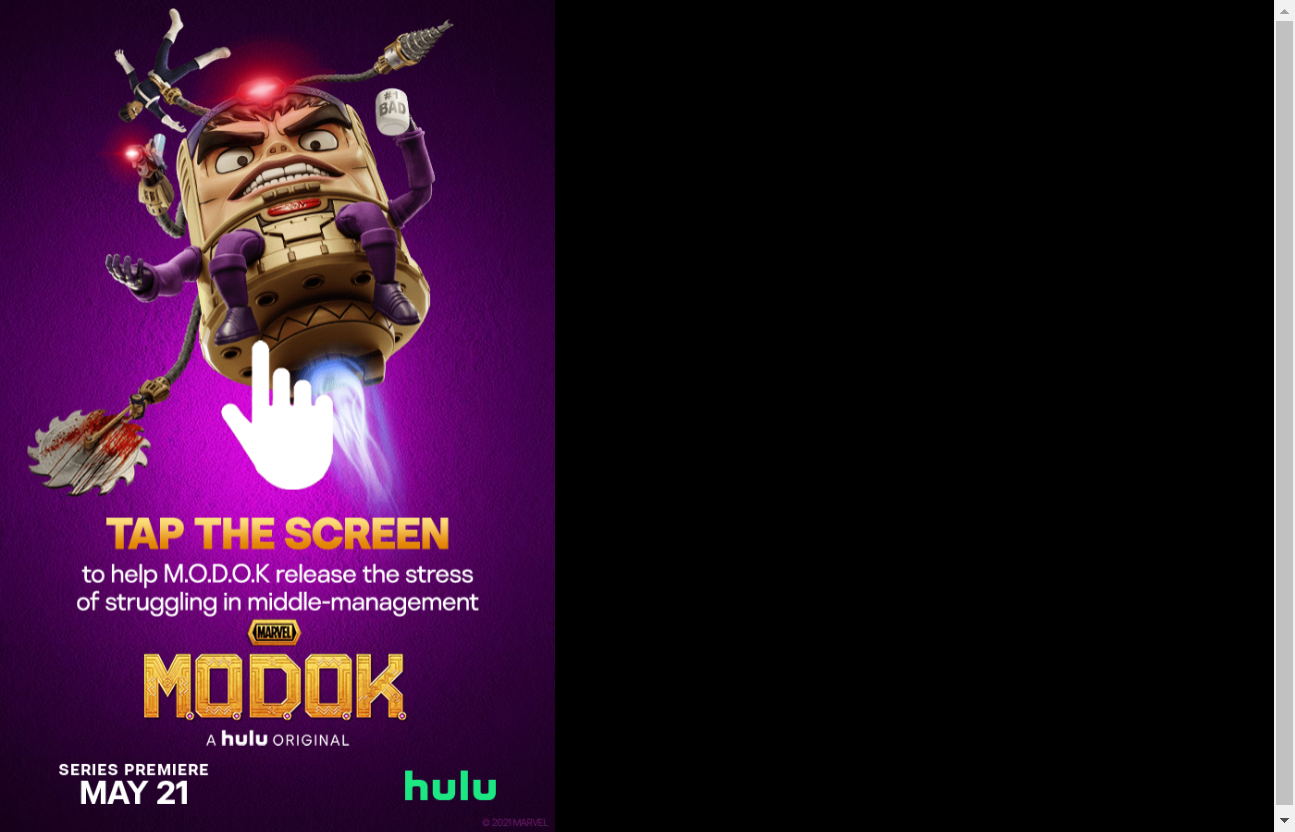

In [124]:
image1 = archive.open('Creative Assets_/8f5834e2093bee23d3b01f8d05265765-23107568c80aeaa20419.png')
Image.open(image1)

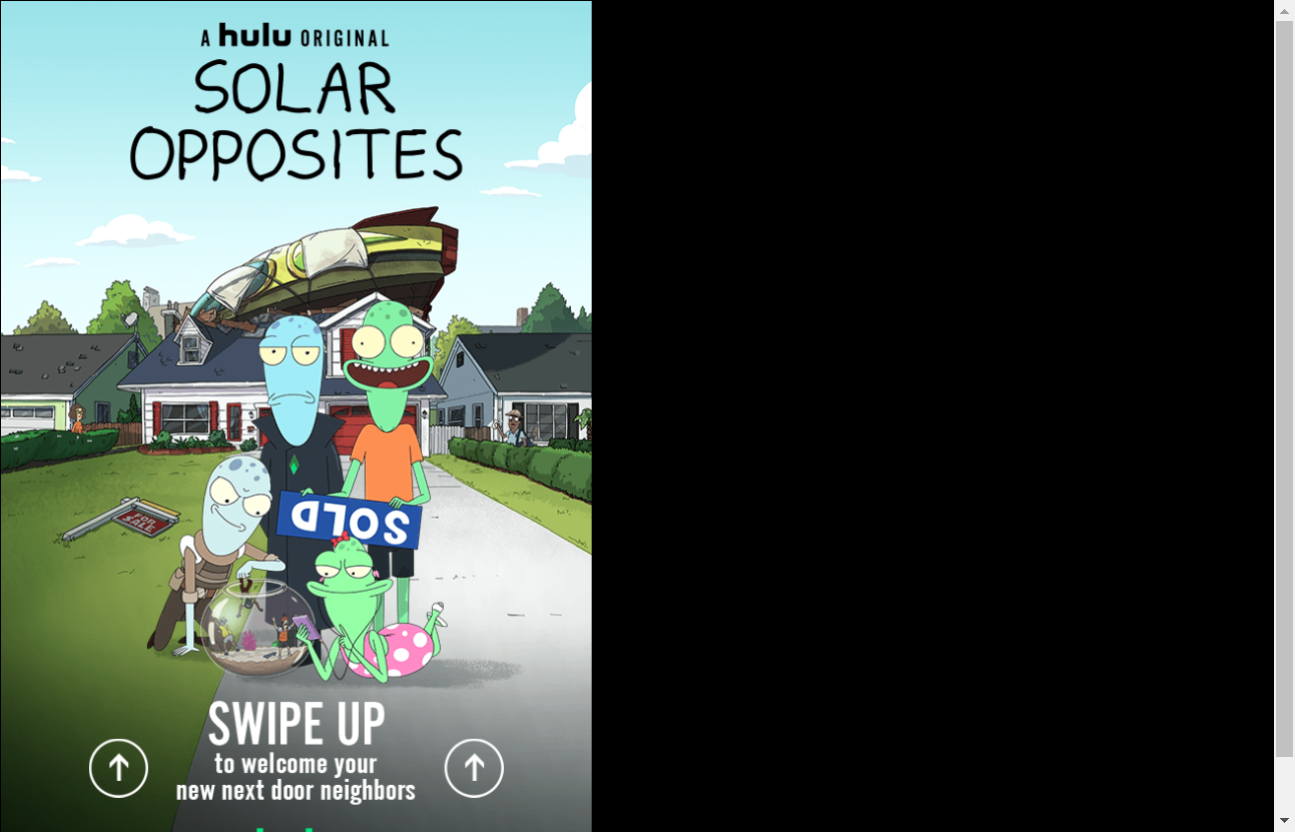

In [131]:
image2 = archive.open('Creative Assets_/e75e67c6aed6b769d05fad9ebce0fe25-e7d72fc488c9cdadafd9.png')
Image.open(image2)

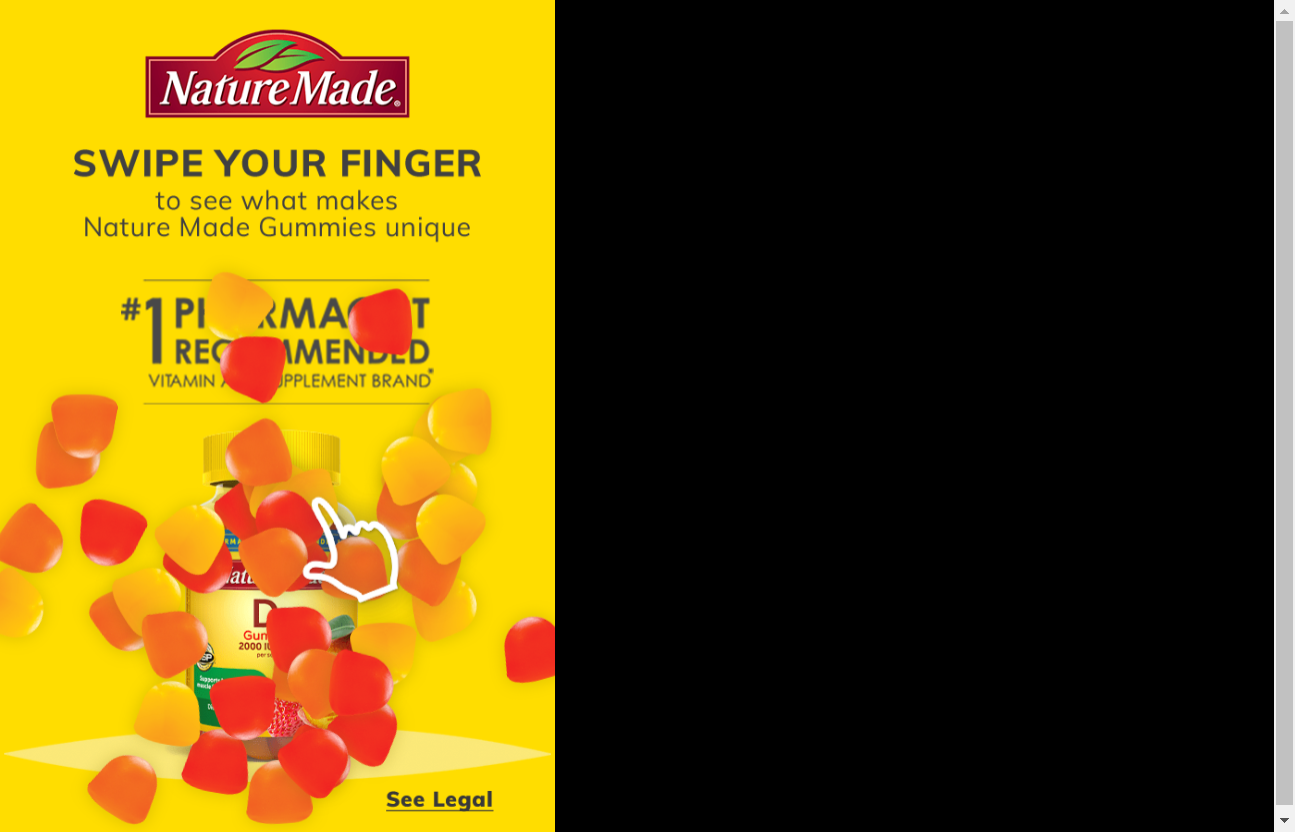

In [134]:
image2 = archive.open('Creative Assets_/adunit-naturemade-gummies-physics-mob-eed7a2ede8893d2a1b02.png')
Image.open(image2)

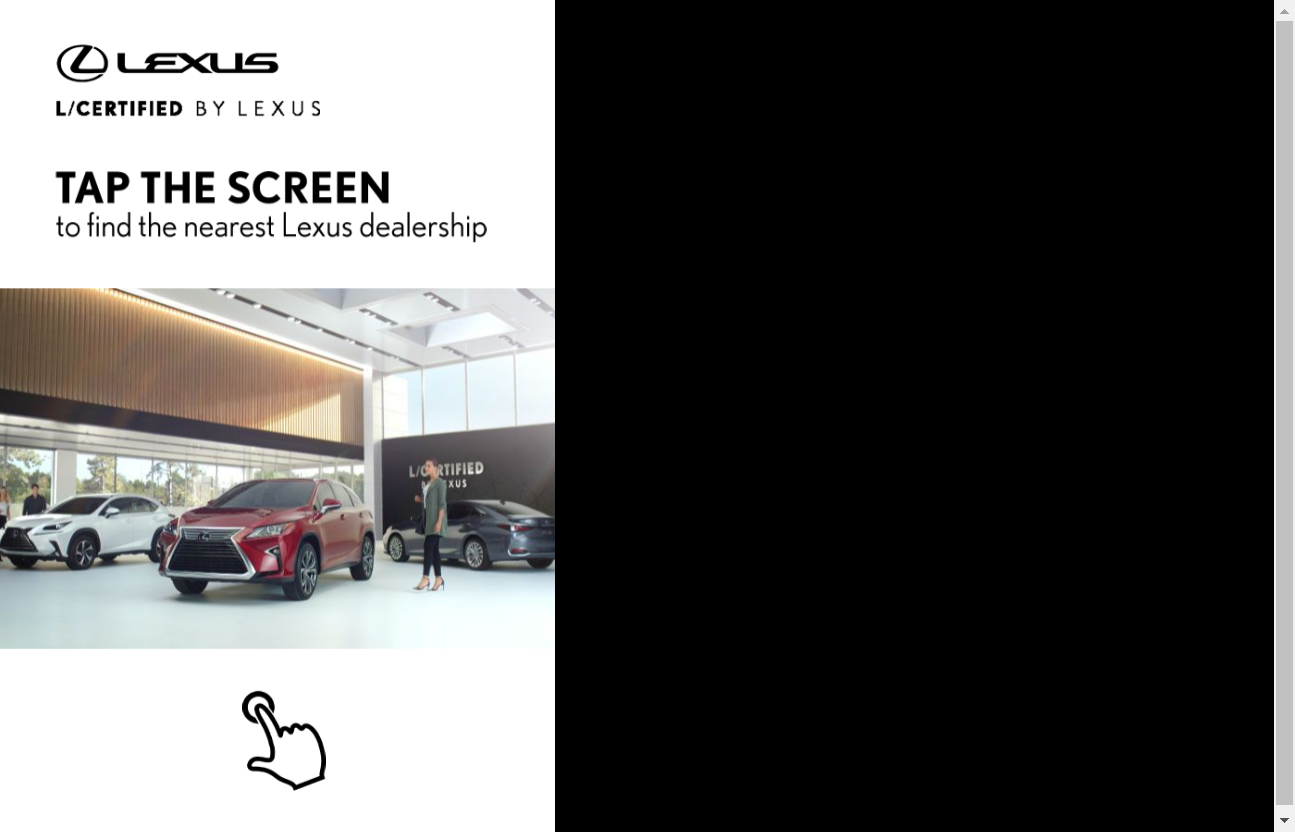

In [147]:
image2 = archive.open('Creative Assets_/df89c44299ec66120e89ab1d1296c26f-449d5c9d52a816548497.png')
Image.open(image2)

# Edge Detection and Image Gradients

In [1]:
import cv2 as cv

In [2]:
img = cv.imread('../images/yellow.png')

In [3]:
import cv2
import pytesseract
import imutils

In [4]:
# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import pytesseract
import argparse
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


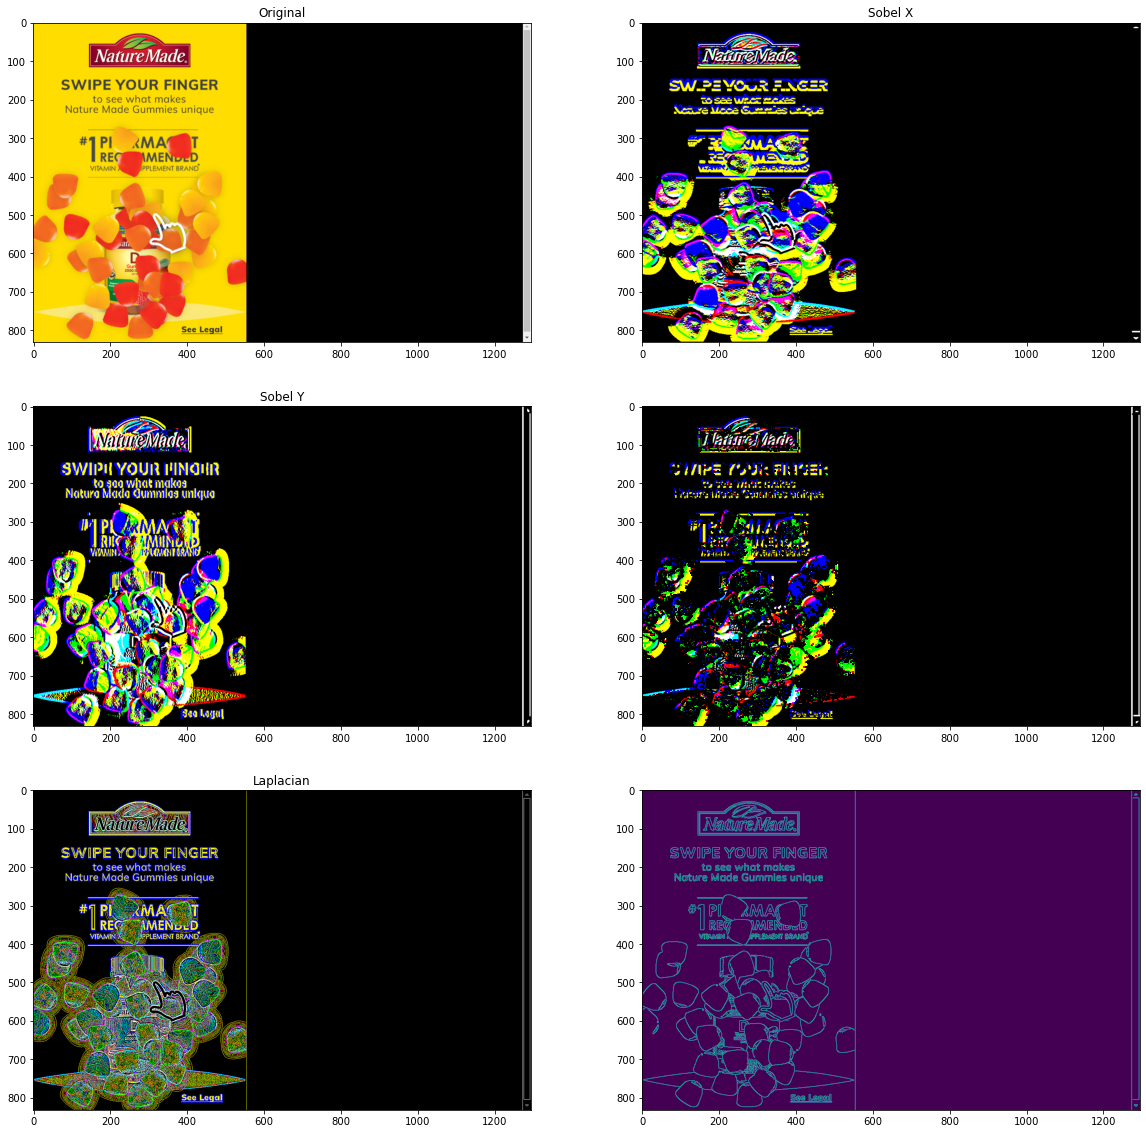

In [6]:
import matplotlib.pyplot as plt
image = cv2.imread('../images/yellow.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hgt, wdt,_ = image.shape
# Sobel Edges
x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)
sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.subplot(3, 2, 4)
plt.imshow(sobel_or)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.imshow(canny)

In [8]:
# text detection from image processing
# code black color
# Selection of contour images based on alphabetical order
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('../images/yellow.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [ ]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to tar

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to target thread (0x555d2d73ec80)

QObject::moveToThread: Current thread (0x555d2d73ec80) is not the object's thread (0x555d2d7a1830).
Cannot move to tar